In [236]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sys
import scipy
from scipy import stats
import sklearn
import statistics
import numpy

In [155]:
data = pd.read_csv('Math_IA_Data.csv', delimiter= ';')
data.head()

,Countries,GDP per Capita,Happiness Score
0,Finland,"53982,6000","7,8210"
1,Denmark,"67803,0000","7,6362"
2,Iceland,"68383,8000","7,5575"
3,Switzerland,"93457,4000","7,5116"
4,Netherlands,"58061,0000","7,4149"


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Countries        142 non-null    object
 1   GDP per Capita   142 non-null    object
 2   Happiness Score  142 non-null    object
dtypes: object(3)
memory usage: 3.5+ KB


In [157]:
data["GDP per Capita"] = [float(str(i).replace(",", ".")) for i in data["GDP per Capita"]]

In [195]:
data["Happiness Score"] = [float(str(i).replace(",", ".")) for i in data["Happiness Score"]]

ValueError: invalid literal for int() with base 10: '7.821'

In [159]:
GDP = data['GDP per Capita']

In [99]:
Happiness = data['Happiness Score']

In [162]:
data.describe(include='all')

,Countries,GDP per Capita,Happiness Score
count,142,142.000000,142.000000
unique,142,NaN,NaN
top,Finland,NaN,NaN
freq,1,NaN,NaN
mean,NaN,16982.086620,5.563129
std,NaN,23655.249231,1.091040
min,NaN,500.400000,2.403800
25%,NaN,2086.450000,4.899250
50%,NaN,6312.800000,5.581800
75%,NaN,21946.175000,6.305025


In [166]:
statistics.variance(Happiness)

1.1903678782384377

In [167]:
statistics.variance(GDP)

559570816.1730821

Text(0.5, 1.0, 'Happiness Rate Histogram')

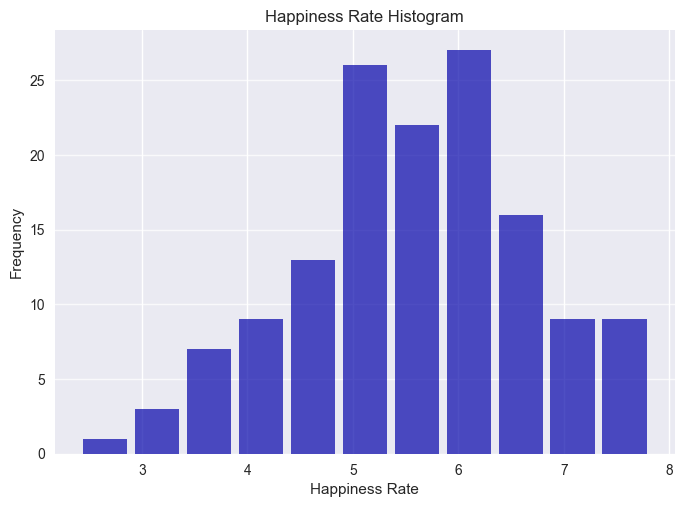

In [116]:
plt.hist(Happiness, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Happiness Rate')
plt.ylabel('Frequency')
plt.title('Happiness Rate Histogram')

Text(0.5, 1.0, 'GDP per Capita Histogram')

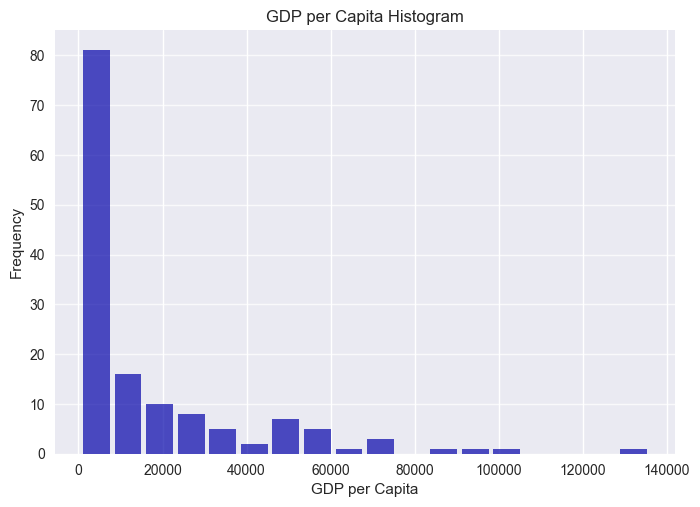

In [118]:
plt.hist(GDP, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.title('GDP per Capita Histogram')

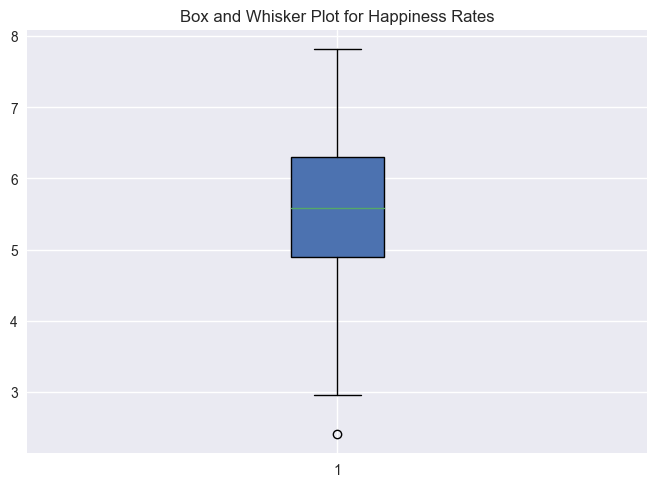

In [150]:
plt.boxplot(Happiness, patch_artist = True)
plt.title("Box and Whisker Plot for Happiness Rates")
colors = ['#0504aa']
 


In [171]:
sort_Happiness = np.sort(Happiness)

In [174]:
Q1_Happiness = np.percentile(sort_Happiness, 25) 
Q2_Happiness = np.percentile(sort_Happiness, 50) 
Q3_Happiness = np.percentile(sort_Happiness, 75) 

IQR_Happiness = Q3_Happiness - Q1_Happiness 
print('Interquartile range of Happiness = ', IQR_Happiness)

Interquartile range of Happiness =  1.4057749999999993


In [175]:
low_lim_Happiness = Q1_Happiness - 1.5 * IQR_Happiness
up_lim_Happiness = Q3_Happiness + 1.5 * IQR_Happiness

print('Low limit of Happiness = ', low_lim_Happiness)
print('High Limit of Happiness', up_lim_Happiness)

Low limit of Happiness =  2.7905875000000013
High Limit of Happiness 8.413687499999998


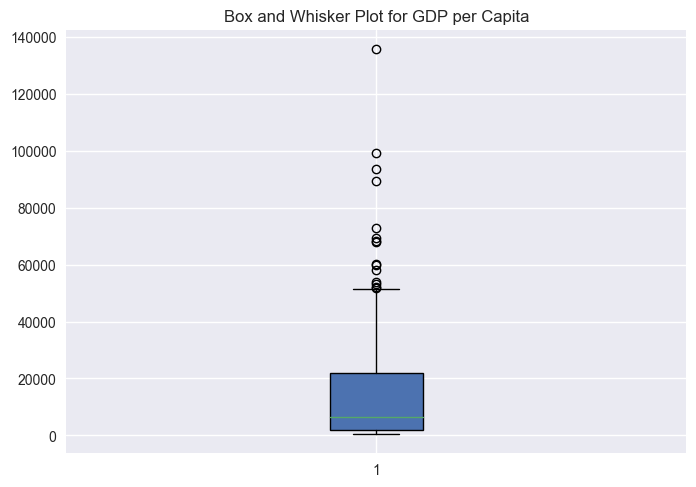

In [151]:
plt.boxplot(GDP, patch_artist = True)
plt.title("Box and Whisker Plot for GDP per Capita")
colors = ['#0504aa']


In [181]:
sort_GDP = np.sort(GDP)

In [185]:
Q1_GDP = np.percentile(sort_GDP, 25) 
Q2_GDP = np.percentile(sort_GDP, 50) 
Q3_GDP = np.percentile(sort_GDP, 75) 

IQR_GDP = Q3_GDP - Q1_GDP 
print('Interquartile range of GDP = ', IQR_GDP)

Interquartile range of GDP =  19859.725


In [186]:
low_lim_GDP = Q1_GDP - 1.5 * IQR_GDP
up_lim_GDP = Q3_GDP + 1.5 * IQR_GDP

print('Low limit of GDP per Capita = ', low_lim_GDP)
print('High Limit of GDP per Capita = ', up_lim_GDP)

Low limit of GDP per Capita =  -27703.137499999997
High Limit of GDP per Capita =  51735.7625


In [233]:
np.cov(Happiness,GDP)

array([[1.19036788e+00, 1.83878817e+04],
       [1.83878817e+04, 5.59570816e+08]])

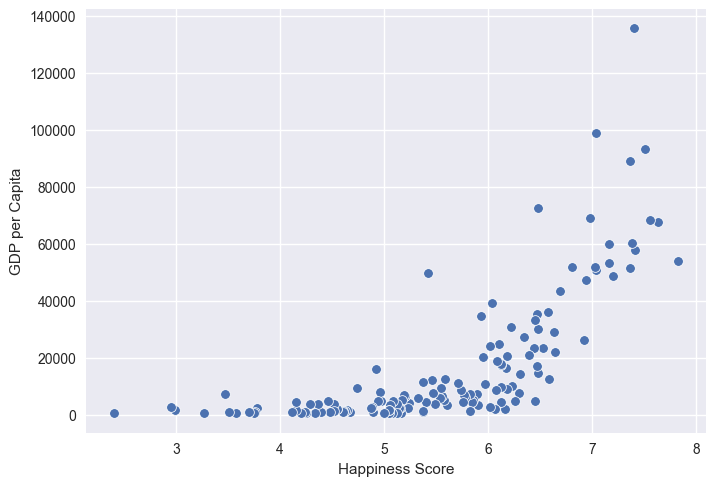

In [164]:
sns.scatterplot(x="Happiness Score", y="GDP per Capita", data=data);

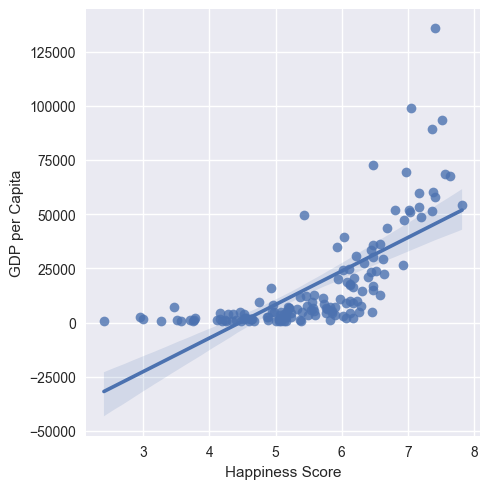

In [237]:
Regline = sns.lmplot(x="Happiness Score", y="GDP per Capita", data=data);

In [221]:
stats.linregress(data['Happiness Score'],data['GDP per Capita'])

LinregressResult(slope=15447.226067956952, intercept=-68952.82273038989, rvalue=0.7124650646996195, pvalue=2.718204969159806e-23, stderr=1285.8167541794733, intercept_stderr=7288.48164527198)

In [228]:
def cov(Happiness, GDP):

    if len(Happiness) != len(GDP):
        return

    a_mean = np.mean(Happiness)
    b_mean = np.mean(GDP)

    sum = 0

    for i in range(0, len(Happiness)):
        sum += ((Happiness[i] - a_mean) * (GDP[i] - b_mean))

    return sum/(len(Happiness)-1)

In [231]:
numpy.cov(Happiness,GDP)

array([[1.19036788e+00, 1.83878817e+04],
       [1.83878817e+04, 5.59570816e+08]])

In [235]:
np.corrcoef(Happiness,GDP)

array([[1.        , 0.71246506],
       [0.71246506, 1.        ]])